## Actividad 5

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

**Descargo los datos y creo una copia con la cual trabajar, van a ser la muestra A**

In [ ]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 7/' 
# path_win =

In [130]:
columnas = ['GalaxyID','GroupID','CentreOfPotential_x','CentreOfPotential_y','CentreOfPotential_z','Stars_Mass','HalfMassRad_Star']

In [131]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat',usecols=columnas)#,index_col='GalaxyID')

In [134]:
table_a = table[(table['Stars_Mass']>=1e10)].copy()
table_a

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star
0,9498012,28000000000002,8.913222,35.828056,54.839039,1.538708e+11,8.828579
1,9508202,28000000000002,6.904262,35.705917,57.397373,7.604099e+10,5.646945
2,9512113,28000000000002,8.682913,35.504921,54.217369,1.345128e+11,8.825949
3,9517736,28000000000002,8.278317,37.063808,54.914932,2.232997e+10,4.576159
4,9519365,28000000000002,8.262937,36.454063,55.901993,4.833353e+10,9.249007
...,...,...,...,...,...,...,...
13131,10365607,28000000002202,35.516003,10.797990,34.600616,1.226640e+10,4.841568
13145,10859653,28000000002570,61.355499,48.616516,65.236801,1.094640e+10,5.472824
13155,11104654,28000000002905,97.197350,82.709518,43.676567,1.200869e+10,4.417672
13164,11247394,28000000003127,88.764885,47.226864,81.905136,1.186733e+10,10.748503


**Filtro la galaxia más masiva de la simulación,G_test:**

In [143]:
mask = (table_a['GalaxyID']==12002343)
G_test = float(table_a['Stars_Mass'][mask])

xmax = table_a['CentreOfPotential_x'][mask]
ymax = table_a['CentreOfPotential_y'][mask]
zmax = table_a['CentreOfPotential_z'][mask]

In [144]:
print(xmax)
print(ymax)
print(zmax)
print(G_test)

13199    81.653595
Name: CentreOfPotential_x, dtype: float64
13199    7.551041
Name: CentreOfPotential_y, dtype: float64
13199    69.749985
Name: CentreOfPotential_z, dtype: float64
10512478208.0


**Creamos la tabla de muestras B con las condiciones que querramos a partir de la tabla de muestra A**

In [145]:
table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)].copy()
table_b

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star
0,9498012,28000000000002,8.913222,35.828056,54.839039,1.538708e+11,8.828579
1,9508202,28000000000002,6.904262,35.705917,57.397373,7.604099e+10,5.646945
2,9512113,28000000000002,8.682913,35.504921,54.217369,1.345128e+11,8.825949
3,9517736,28000000000002,8.278317,37.063808,54.914932,2.232997e+10,4.576159
4,9519365,28000000000002,8.262937,36.454063,55.901993,4.833353e+10,9.249007
...,...,...,...,...,...,...,...
13131,10365607,28000000002202,35.516003,10.797990,34.600616,1.226640e+10,4.841568
13145,10859653,28000000002570,61.355499,48.616516,65.236801,1.094640e+10,5.472824
13155,11104654,28000000002905,97.197350,82.709518,43.676567,1.200869e+10,4.417672
13164,11247394,28000000003127,88.764885,47.226864,81.905136,1.186733e+10,10.748503


**A la tabla de muestra B agregamos una columna que contenga la información de la distancia que tiene la galaxia indicada con
la más masiva de la simulación**

In [146]:
table_b['Distancias_test'] = np.sqrt( (table_b['CentreOfPotential_x'].to_numpy()-float(xmax))**2
                                     +(table_b['CentreOfPotential_y'].to_numpy()-float(ymax))**2
                                     +(table_b['CentreOfPotential_z'].to_numpy()-float(zmax))**2)
table_b = table_b.sort_values(by=['Distancias_test'],ascending=True)

table_b

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star,Distancias_test
13199,12002343,28000000004258,81.653595,7.551041,69.749985,1.051248e+10,4.104519,0.000000
5247,9319534,28000000001422,81.512810,7.892962,70.192215,2.125554e+10,4.410888,0.576453
2267,16828343,28000000000025,80.906441,8.055350,68.953453,5.944607e+10,6.442783,1.202926
2263,12155759,28000000000025,80.698387,7.565343,68.578499,1.073051e+10,3.987599,1.511624
2264,12156651,28000000000025,81.927124,8.496295,68.488792,2.314699e+10,4.223968,1.599665
...,...,...,...,...,...,...,...,...
7893,14329684,28000000000151,34.332314,93.107407,0.375310,1.269320e+11,13.156837,119.883447
7895,1390572,28000000000151,34.315887,93.071381,0.338322,1.202681e+10,2.997190,119.885637
8523,10570405,28000000002438,42.433979,98.882729,1.007927,1.556441e+10,7.327518,120.851669
9359,9981020,28000000001819,9.975326,84.877281,8.793514,1.039988e+10,2.907931,121.790037


**Calculamos el parámetro número de vecinas de la galáxia G_test a una distancia menos a 2Mpc(N_2) para la muestra B:**

In [147]:
N_2 = table_b[(table_b['Distancias_test']<=2)].sort_values(by=['Distancias_test'],ascending=True).copy()
N_2

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star,Distancias_test
13199,12002343,28000000004258,81.653595,7.551041,69.749985,1.051248e+10,4.104519,0.000000
5247,9319534,28000000001422,81.512810,7.892962,70.192215,2.125554e+10,4.410888,0.576453
2267,16828343,28000000000025,80.906441,8.055350,68.953453,5.944607e+10,6.442783,1.202926
2263,12155759,28000000000025,80.698387,7.565343,68.578499,1.073051e+10,3.987599,1.511624
2264,12156651,28000000000025,81.927124,8.496295,68.488792,2.314699e+10,4.223968,1.599665
2287,6656922,28000000000025,81.360245,8.461600,68.461952,1.008871e+10,2.542474,1.604431
2286,6650953,28000000000025,81.344185,8.552734,68.423569,2.726530e+10,3.484781,1.690711
2279,6659446,28000000000025,81.363083,8.594688,68.364235,1.154251e+10,3.659270,1.758948
2284,18737995,28000000000025,81.387962,8.587143,68.342331,4.141198e+11,37.726452,1.767924
2262,12154474,28000000000025,80.770180,8.709840,68.518692,3.156789e+10,4.258410,1.907700


In [148]:
r_sep_1= table_b['Distancias_test'].to_numpy()[1]/(table_b['HalfMassRad_Star'].to_numpy()[0]/1000+table_b['HalfMassRad_Star'].to_numpy()[1]/1000) #HalfMassRad_Star, en la columna 13, está en kpc.
r_sep_2= table_b['Distancias_test'].to_numpy()[2]/(table_b['HalfMassRad_Star'].to_numpy()[0]/1000+table_b['HalfMassRad_Star'].to_numpy()[2]/1000)

In [149]:
mu_1 = table_b['Stars_Mass'].to_numpy()[1]/table_b['Stars_Mass'].to_numpy()[0]
mu_2 = table_b['Stars_Mass'].to_numpy()[2]/table_b['Stars_Mass'].to_numpy()[0]

**Creamos un nuevo DataFrame que contenga los datos que nos interecen(estaría bueno hacer más general el proceso de selección de los lugares)** 

In [150]:
data = {'GalaxyID_test':[table_b['GalaxyID'].to_numpy()[0]],'GroupID_test':[table_b['GroupID'].to_numpy()[0]],
        'GalaxyID_V1':[table_b['GalaxyID'].to_numpy()[1]],'GalaxyID_V2':[table_b['GalaxyID'].to_numpy()[2]],
        'R_1':[table_b['Distancias_test'].to_numpy()[1]],'R_2':[table_b['Distancias_test'].to_numpy()[2]],
        'r_sep_1':r_sep_1,'r_sep_2':r_sep_2,'mu_1':mu_1,'mu_2':mu_2,'N_2':[len(N_2)-1]}

DATA = pd.DataFrame(data=data)
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_2
0,12002343,28000000004258,9319534,16828343,0.576453,1.202926,67.695244,114.050544,2.021934,5.65481,9


**Creo que también está bueno guardarnos las posiciones relativas de las vecinas respecto de la galaxia central, para poder hacer scatter plots
más rápido.
Paso a hacer los gráficos en 2D y 3D.**

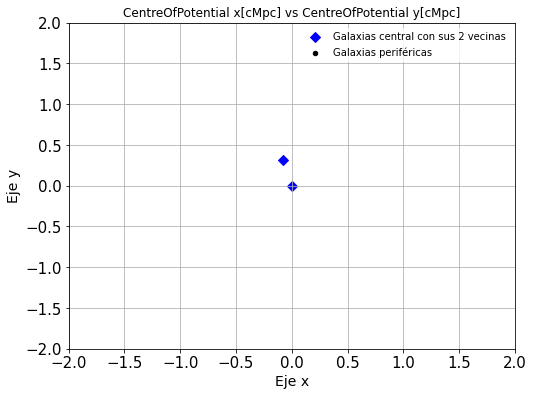

In [93]:
eje_1 = 'x'
eje_2 = 'y'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(ymax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(ymax)


ax.scatter(xvar_1,yvar_1,marker='D',s=50,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=20,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

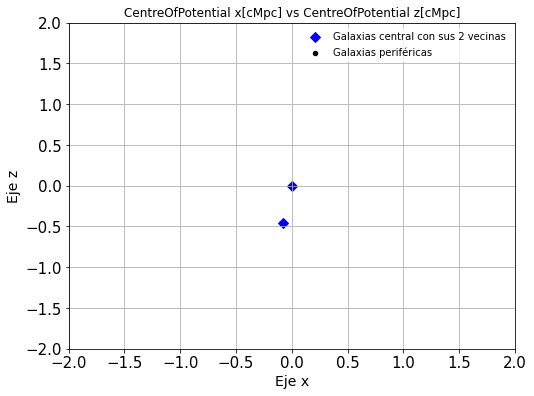

In [94]:
eje_1 = 'x'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)


ax.scatter(xvar_1,yvar_1,marker='D',s=50,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=20,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

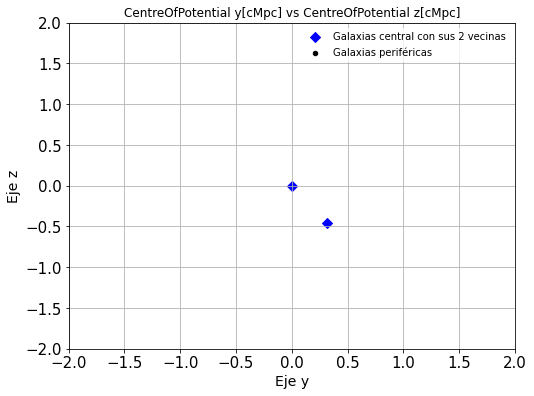

In [95]:
eje_1 = 'y'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(ymax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(ymax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)

ax.scatter(xvar_1,yvar_1,marker='D',s=50,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=20,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

Ploteo en 3D

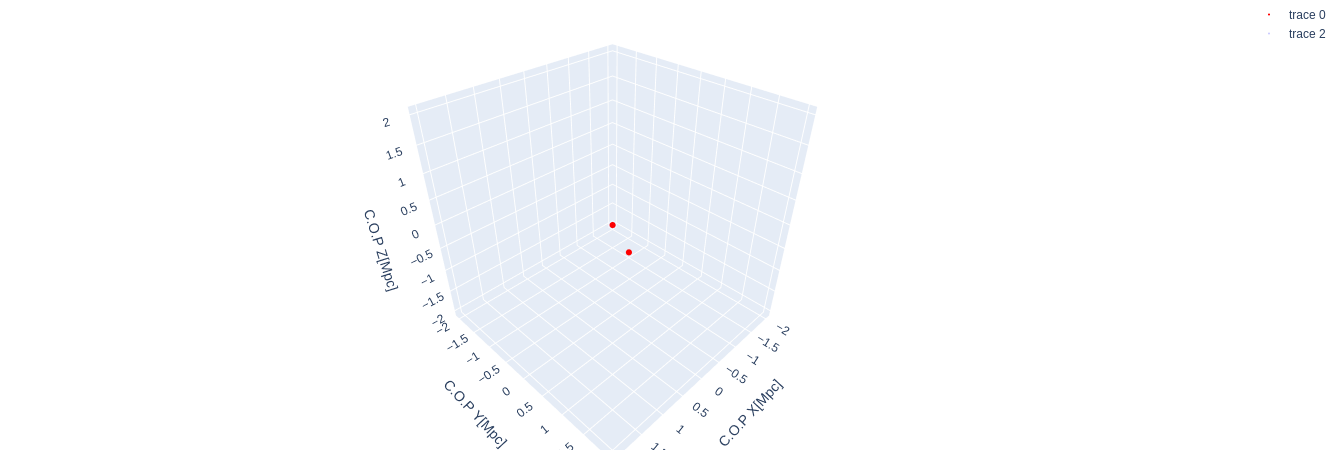

In [96]:
xvar_1= N_2['CentreOfPotential_x'].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_y'].iloc[0:3]-float(ymax)
zvar_1= N_2['CentreOfPotential_z'].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_x'].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_y'].iloc[3:]-float(ymax)
zvar_2= N_2['CentreOfPotential_z'].iloc[3:]-float(zmax)

x_lim = [-2,2]
y_lim = [-2,2]
z_lim = [-2,2]

fig = go.Figure(data=[go.Scatter3d(
    x=xvar_1,
    y=yvar_1,
    z=zvar_1,
    mode='markers',
    marker=dict(
        size = 2,
        color='red',
        opacity=1
    )
    ),go.Scatter3d(
        x=xvar_2,
        y=yvar_2,
        z=zvar_2,
        mode='markers',
        marker=dict(
        size = 1,
        color='blue',
        opacity=1
    )      
    ),go.Scatter3d(
        x=x_lim,
        y=y_lim,
        z=z_lim,
        mode='markers',
        marker=dict(
        size=0,
        color='blue',
        opacity=0.01))
                     ])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=70,
                    margin =dict(l=0, r=0, b=0, t=0))



fig.show()
